<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="1.-Откройте-файл-с-данными-и-изучите-общую-информацию.-1">1. Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2">Вывод</a></span></li><li><span><a href="#2.-Предобработка-данных" data-toc-modified-id="2.-Предобработка-данных-3">2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#2.1.-Меняем-наименование-столбцов:" data-toc-modified-id="2.1.-Меняем-наименование-столбцов:-3.1">2.1. Меняем наименование столбцов:</a></span></li><li><span><a href="#2.2.-Обработка-пропусков" data-toc-modified-id="2.2.-Обработка-пропусков-3.2">2.2. Обработка пропусков</a></span></li><li><span><a href="#2.3.-Замена-типа-данных" data-toc-modified-id="2.3.-Замена-типа-данных-3.3">2.3. Замена типа данных</a></span></li></ul></li><li><span><a href="#3.-Посчитайте-и-добавьте-в-таблицу" data-toc-modified-id="3.-Посчитайте-и-добавьте-в-таблицу-4">3. Посчитайте и добавьте в таблицу</a></span></li><li><span><a href="#4.-Проведите-исследовательский-анализ-данных-и-выполните-инструкции:" data-toc-modified-id="4.-Проведите-исследовательский-анализ-данных-и-выполните-инструкции:-5">4. Проведите исследовательский анализ данных и выполните инструкции:</a></span><ul class="toc-item"><li><span><a href="#4.1.-Изучаем-параметры" data-toc-modified-id="4.1.-Изучаем-параметры-5.1">4.1. Изучаем параметры</a></span></li><li><span><a href="#4.2.-Исследование-времени-продажи-квартиры." data-toc-modified-id="4.2.-Исследование-времени-продажи-квартиры.-5.2">4.2. Исследование времени продажи квартиры.</a></span></li><li><span><a href="#4.3.-Какие-фаторы-больше-всего-влияют-на-стоимость-квартиры?" data-toc-modified-id="4.3.-Какие-фаторы-больше-всего-влияют-на-стоимость-квартиры?-5.3">4.3. Какие фаторы больше всего влияют на стоимость квартиры?</a></span></li><li><span><a href="#4.4.-Изучения-предложений-квартир" data-toc-modified-id="4.4.-Изучения-предложений-квартир-5.4">4.4. Изучения предложений квартир</a></span></li><li><span><a href="#4.5.-Анализ-квартир-в-центре" data-toc-modified-id="4.5.-Анализ-квартир-в-центре-5.5">4.5. Анализ квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1. Откройте файл с данными и изучите общую информацию. 

In [7]:
import pandas as pd
from IPython.display import display
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.sample(11)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22075,9,1900000.0,30.3,2019-03-06T00:00:00,1,NaN,2.0,18.5,2,NaN,...,4.4,NaN,посёлок городского типа Тайцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23425,20,5900000.0,62.0,2018-04-24T00:00:00,3,2.65,9.0,43.5,6,NaN,...,6.3,1.0,Санкт-Петербург,51964.0,13985.0,1.0,649.0,1.0,832.0,NaN
15433,19,3700000.0,34.0,2018-10-31T00:00:00,1,2.60,5.0,17.7,5,NaN,...,7.8,1.0,Санкт-Петербург,27725.0,11702.0,2.0,216.0,0.0,NaN,7.0
3696,15,3800000.0,48.4,2018-10-25T00:00:00,2,2.50,9.0,29.0,1,NaN,...,8.5,NaN,Санкт-Петербург,14260.0,16238.0,0.0,NaN,1.0,478.0,99.0
15296,7,4950000.0,53.0,2018-07-10T00:00:00,2,2.50,9.0,33.0,9,NaN,...,6.8,NaN,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,62.0
17109,12,4500000.0,40.5,2018-07-10T00:00:00,1,2.70,10.0,20.0,2,NaN,...,11.5,2.0,Санкт-Петербург,32690.0,12283.0,0.0,NaN,0.0,NaN,50.0
2227,11,3400000.0,37.0,2017-05-12T00:00:00,1,NaN,9.0,16.0,1,NaN,...,10.0,2.0,Санкт-Петербург,13557.0,12353.0,0.0,NaN,0.0,NaN,111.0
1853,10,3100000.0,38.3,2017-12-12T00:00:00,2,2.70,2.0,27.5,1,NaN,...,4.0,NaN,посёлок Песочный,56095.0,25867.0,0.0,NaN,0.0,NaN,14.0
20911,8,12000000.0,110.0,2016-06-24T00:00:00,4,3.34,5.0,64.0,5,False,...,10.0,0.0,Санкт-Петербург,22468.0,1308.0,0.0,NaN,3.0,382.0,109.0
15241,10,2480000.0,41.8,2019-04-09T00:00:00,2,2.70,5.0,25.2,4,NaN,...,5.6,1.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Читаем файл `real_estate_data.csv` с применением разделителя значений `'\t'` и сохраняем его в переменную __df__.

Общая информация о DataFrame:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Всего у нас 22 столбца. И довольно много на первый взгляд пропусков. Некоторым столбцам нужно будет поменять тип данных.

 Разберём столбцы и что в них содержится:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Посмотрим на общее описание числовых данных для __df__.

In [10]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Максимальные значения некоторых столбцов удивляют конечно, но всё возможно. Однако стоит проверить данные на выбросы.

## Вывод

Перед тем как начать работать с данными, нужно их предобработать:
- переименовать и превести к общему регистру столбцы: _cityCenters_nearest_, _parks_around3000_ и _ponds_around3000_;
- проверить таблицу на дубликаты и пропуски;
- перевести данные в более удобный формат;
- проверить данные на выбросы.

## 2. Предобработка данных

### 2.1. Меняем наименование столбцов:

- `cityCenters_nearest` на __city_centers_nearest__
- `parks_around3000` на __parks_around__
- `ponds_around3000` на __ponds_around__

In [11]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                   'parks_around3000': 'parks_around', 'ponds_around3000': 'ponds_around'}, inplace=True)

Проверяем

In [12]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

### 2.2. Обработка пропусков

Посмотрим что у нас с пропущенными значениями:

In [13]:
(df.isna().mean().sort_values(ascending = False))*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around            23.283683
ponds_around            23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
first_day_exposition     0.000000
last_price               0.000000
total_area               0.000000
studio                   0.000000
rooms                    0.000000
floor                    0.000000
open_plan                0.000000
total_images             0.000000
dtype: float64

Их очень много. В 9 столбцах пропусков больше 20%. Будем разбираться по порядку:

In [14]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Данные были не заполнены, т.к. не все люди знают что это за тип жилья, а те кто знают отметили по соответсвию. Скорее всего нет данных т.к. это не обязательное поле, и большинство людей просто не знают что оно значит. Поэтому пропущенные значения приравняем к __False__.

In [15]:
df['is_apartment'] = df['is_apartment'].fillna(False)

__parks_nearest__ и __ponds_nearest__ пока заполнять не будем т.к. скорее всего заполняется самой системой в пределах определённого радиуса по карте. Сответсвенно, если система не нашла ближайший парк или водоём в своей "зоне поиска" то и данных нет.

__balcony__ - балконы либо есть, либо их нет. Посмотрим что у нас с ними:

In [16]:
rooms_before3 = df.query('rooms < 4')
print('Пропусков в столбце balcony', df['balcony'].isna().sum())
print('Пропусков в столбце balcony, если комнат не больше трёх', rooms_before3['balcony'].isna().sum())

Пропусков в столбце balcony 11519
Пропусков в столбце balcony, если комнат не больше трёх 10560


Почти все пропущенные значения относятся к квартирам массовой застройки (от студий до 3-ёх комнат). Т.к. после появлений студий и апартаментов всё больше домов стали строить без балконов, а ещё их нет во многих "хрущёвках", в зданиях предназначенных ранее для общежитий и на первых этажах большинства домов, то эти пропуски заполним 0.

In [17]:
df['balcony'] = df['balcony'].fillna(0)

Посмотрим, что у нас с высотой потолков __ceiling_height__, в таблице "числовых данных" было значение 100м при этом медианное значение 2.65м, так бывает? :)

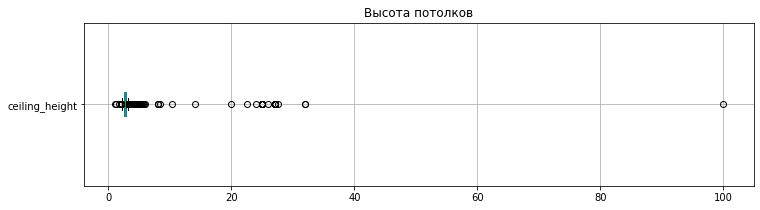

In [18]:
df.boxplot(column='ceiling_height', figsize=(12,3), vert=False).set_title("Высота потолков")
plt.show()

Очевидно что это выброс, заполним по медиане:

In [19]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

__airports_nearest__, __city_centers_nearest__, __parks_around__ и __ponds_around__ пока заполнять не будем по той же причине что и _parks_nearest_ с _ponds_nearest_: "скорее всего заполняется самой системой в пределах определённого радиуса по карте".

__days_exposition__ логично предположить, этих данных просто нет. Во-первых, продажу могли произвести, но на сервисе не отметить факт продажи. Во-вторых, объявление может быть ещё активным. Поэтому пока заполнять их тоже не будем.

__living_area__ и __kitchen_area__. Для того чтобы заполнить пропуски в этих данных, нужно сделать срезы по числу комнат (эти данные у нас есть).

Для начала посмотрим распределение на количество объявлений и комнат:

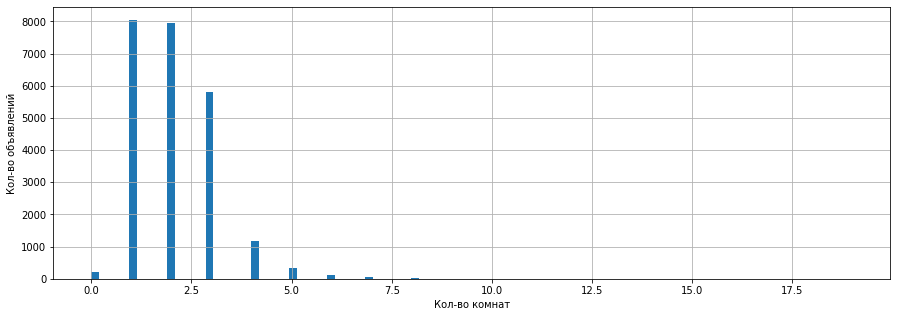

In [20]:
df['rooms'].hist(bins = 100, figsize=(15, 5))
plt.xlabel("Кол-во комнат")
plt.ylabel("Кол-во объявлений")
plt.show()

0 комнат, странное количество, посмотрим сколько таких квартир, и каких они размеров:

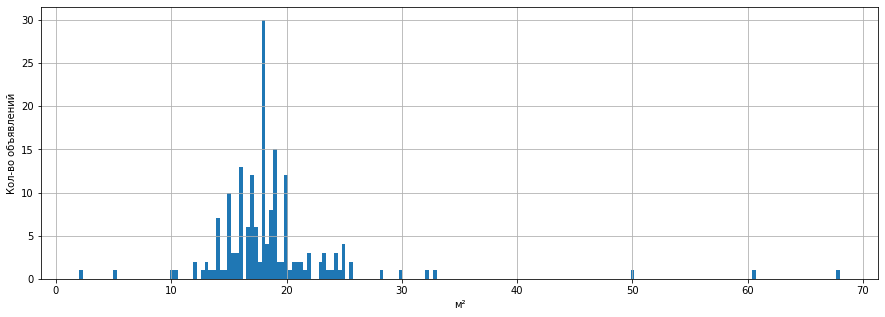

Количество объявлений со значением комнат "0": 197


In [21]:
rooms_zero = df.query('rooms < 1')
# строим гистограмму
rooms_zero['living_area'].hist(bins = 200, figsize=(15, 5))
plt.xlabel("м²")
plt.ylabel("Кол-во объявлений")
plt.show()
# считаем кол-во
print('Количество объявлений со значением комнат "0":', len(rooms_zero))

Всего 197 объявлений, основная масса от 10м² до 30м². Скорее всего это студии, лучше их приравнять к однокомнатным, множество ресурсов так и делает, тем более что студии у нас категоризированы.

In [22]:
df['rooms'] = df['rooms'].replace(0, 1)

Сделаем следующие выборки:
- 1-комнатные;
- 2-комнатные;
- 3-комнатные;
- многокомнатные квартиры (4+ комнат).

In [23]:
rooms_1 = df.query('rooms == 1')
rooms_2 = df.query('rooms == 2')
rooms_3 = df.query('rooms == 3')
rooms_top = df.query('rooms > 3')
print('Количество объявлений')
print('Однокомнатные:', len(rooms_1))
print('Двухкомнатные:', len(rooms_2))
print('Трёхкомнатные:', len(rooms_3))
print('Многокомнатные:', len(rooms_top))

Количество объявлений
Однокомнатные: 8244
Двухкомнатные: 7940
Трёхкомнатные: 5814
Многокомнатные: 1701


Посмотрим на распределение жилой площади этих квартир:

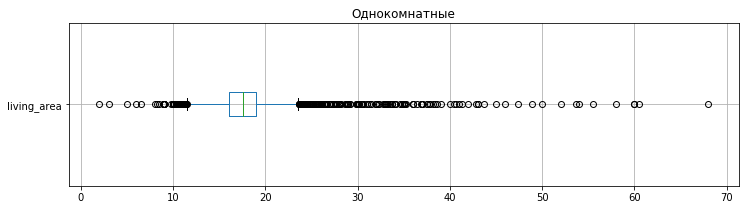

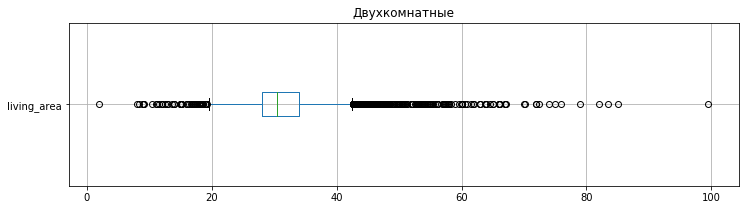

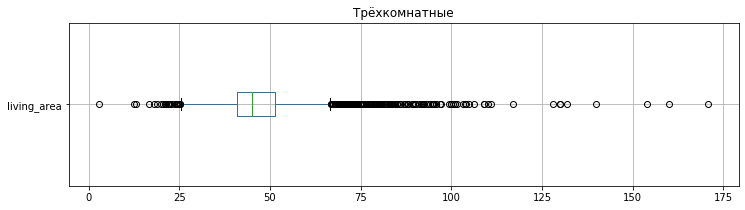

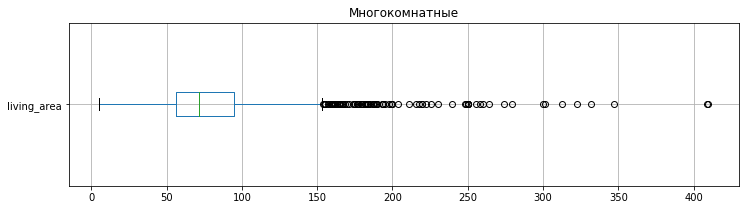

In [24]:
# поместим значения в переменную:
list_rooms = {
    'Однокомнатные':rooms_1, 'Двухкомнатные':rooms_2, 
    'Трёхкомнатные':rooms_3, 'Многокомнатные':rooms_top,}
# создадим цикл для boxplot:
for key in list_rooms:
    list_rooms[key].boxplot(column='living_area', figsize=(12,3), vert=False).set_title(key)
    plt.show()

Пропуски вполне можно менять по медианам:

In [25]:
df['living_area'].isna().sum()

1903

In [26]:
df.loc[(df['living_area'].isnull()) & (df['rooms']==1), 'living_area'] = rooms_1['living_area'].median()
df.loc[(df['living_area'].isnull()) & (df['rooms']==2), 'living_area'] = rooms_2['living_area'].median()
df.loc[(df['living_area'].isnull()) & (df['rooms']==3), 'living_area'] = rooms_3['living_area'].median()
df.loc[(df['living_area'].isnull()) & (df['rooms']>3), 'living_area'] = rooms_top['living_area'].median()

Посмотрим на распределение площади кухонь этих квартир:

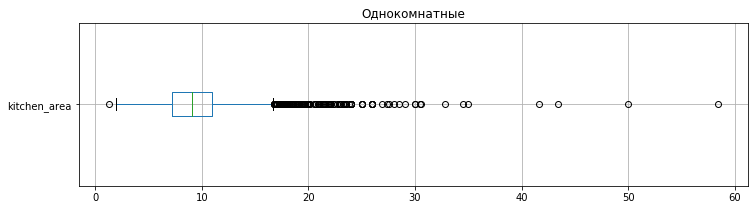

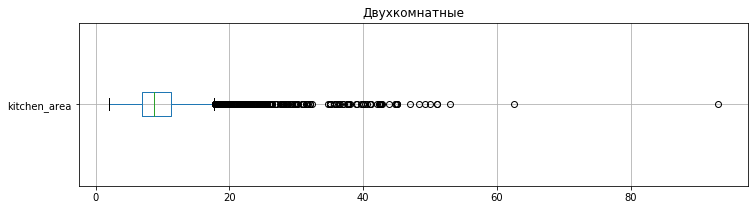

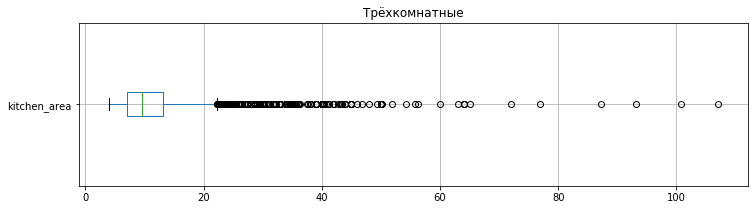

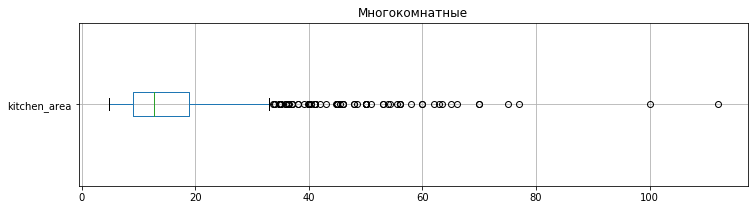

In [27]:
# создадим цикл для boxplot:
for key in list_rooms:
    list_rooms[key].boxplot(column='kitchen_area', figsize=(12,3), vert=False).set_title(key)
    plt.show()

Тоже поменяем по медианным значениям:

In [28]:
df['kitchen_area'].isna().sum()

2278

In [29]:
df.loc[(df['kitchen_area'].isnull()) & (df['rooms']==1), 'kitchen_area'] = rooms_1['kitchen_area'].median()
df.loc[(df['kitchen_area'].isnull()) & (df['rooms']==2), 'kitchen_area'] = rooms_2['kitchen_area'].median()
df.loc[(df['kitchen_area'].isnull()) & (df['rooms']==3), 'kitchen_area'] = rooms_3['kitchen_area'].median()
df.loc[(df['kitchen_area'].isnull()) & (df['rooms']>3), 'kitchen_area'] = rooms_top['kitchen_area'].median()

__floors_total__ и __locality_name__ - эти параметры важны для нашего исследования, их нужно указать, либо избавиться от них. Выясним сначала сколько всего пропущенных значений:

In [30]:
print('Количество объявлений с пропусками в этажности дома:', df['floors_total'].isna().sum())
print('Количество объявлений с пропусками населённого пункта:', df['locality_name'].isna().sum())

Количество объявлений с пропусками в этажности дома: 86
Количество объявлений с пропусками населённого пункта: 49


Не много, избавимся от них, на исследование это не повлияет:

In [31]:
df = df.dropna(axis='index', how='any', subset=['floors_total','locality_name']).reset_index(drop=True)

Проверим дубли:

In [32]:
df.duplicated().sum()

0

Отлично, данные поправили. Перепроверим что у нас получилось:

In [33]:
(df.isna().mean().sort_values(ascending = False))*100

parks_nearest           65.924040
ponds_nearest           61.654997
airports_nearest        23.441545
city_centers_nearest    23.343942
ponds_around            23.339699
parks_around            23.339699
days_exposition         13.456397
living_area              0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
studio                   0.000000
floor                    0.000000
is_apartment             0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
total_images             0.000000
dtype: float64

### 2.3. Замена типа данных

Теперь посмотрим на типы данных. И поменяем их на те, с которыми нам будет удобнее работать:

In [34]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
city_centers_nearest    18064 non-null float64
parks_around            18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Меняем в целочисленный тип данных:__last_price__, __floors_total__, __balcony__, __airports_nearest__, __city_centers_nearest__, __parks_around__, __parks_nearest__, __ponds_around__, __ponds_nearest__ и __days_exposition__.

Для того чтобы поменять тип данных в тех столбцах где мы _не заполняли пропуски_, нужно `замаркировать` эти пропуски, например отрицательным значением __-9__.

In [35]:
# создадим список для маркировки:
df_to_mark = ['airports_nearest', 'city_centers_nearest', 
             'parks_around', 'parks_nearest','ponds_around', 'ponds_nearest', 'days_exposition']
# заменим пропуски:
for mark in df_to_mark:
    df[mark] = df[mark].fillna(-9)

In [36]:
# создадим список с наименованием столбцов:
df_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 
             'parks_around', 'parks_nearest','ponds_around', 'ponds_nearest', 'days_exposition']
# теперь можно и тип поменять:
for i in df_to_int:
    df[i] = df[i].astype('int')

Посмотрим как выглядит таблица теперь:

In [37]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
16584,7,5400000,82.00,2015-03-10T00:00:00,3,2.65,21,45.60,11,False,...,15.4,0,Санкт-Петербург,21793,17121,0,-9,1,31,1004
17881,12,4000000,41.30,2018-02-13T00:00:00,1,2.70,15,18.20,14,False,...,10.0,0,Санкт-Петербург,27246,9059,0,-9,0,-9,63
13826,7,2800000,30.34,2018-08-22T00:00:00,1,2.65,18,15.60,1,False,...,9.2,1,посёлок Мурино,-9,-9,-9,-9,-9,-9,16
3430,7,6500000,61.00,2016-04-08T00:00:00,3,2.65,5,36.00,1,False,...,7.5,0,Санкт-Петербург,24502,5070,1,330,0,-9,158
23000,16,4100000,41.20,2018-10-16T00:00:00,1,2.65,19,18.00,15,False,...,11.3,1,посёлок Шушары,11858,17411,0,-9,0,-9,13
5787,0,1750000,58.00,2016-01-18T00:00:00,3,2.55,9,41.00,9,False,...,7.0,0,Светогорск,-9,-9,-9,-9,-9,-9,213
989,8,4550000,60.00,2017-12-18T00:00:00,3,2.50,9,39.00,1,False,...,7.0,2,Санкт-Петербург,49725,15726,0,-9,0,-9,119
1063,14,12900000,158.60,2017-11-24T00:00:00,5,3.00,5,125.00,5,False,...,25.0,0,Санкт-Петербург,22452,4172,1,626,0,-9,499
6171,16,25000000,121.00,2017-07-10T00:00:00,2,3.30,7,57.70,6,False,...,42.4,0,Санкт-Петербург,26875,5578,2,484,1,302,123
13939,10,7200000,80.00,2019-03-15T00:00:00,3,2.75,28,46.15,4,False,...,11.1,2,посёлок Парголово,53734,19942,0,-9,0,-9,-9


Остальные данные вполне пригодны, т.к. квадратные метры имеют десятую долю и это влияет на стоимость за 0,5м².

## 3. Посчитайте и добавьте в таблицу

Добавим в таблицу столбец с указанием стоимости за м² каждого объявления и сразу отсечём копейки, т.к. они нам ни к чему:

In [38]:
df['m2_price'] = df['last_price']/df['total_area']
df['m2_price'] = df['m2_price'].astype('int')

Теперь нужно добавить столбцы с _днём недели_ , _месяцем_ , _годом_ создания объявления. 

In [39]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [40]:
df['day_of_weak'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].apply(lambda x: x.year)

Добавим этаж квартиры: первый, последний, другой:

In [41]:
df['floor_level'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['floor_level'] = np.where(df['floor'] == df['floors_total'], 'последний', df['floor_level'])

Добавим в таблицу соотношение жилой и общей площиди, а также отношение площади кухни к общей:

In [42]:
df['ratio_living_area'] = df['living_area']/df['total_area']
df['ratio_kitchen_area'] = df['kitchen_area']/df['total_area']
# округлим до двух знаков после запятой:
df['ratio_living_area'] = df['ratio_living_area'].round(2)
df['ratio_kitchen_area'] = df['ratio_kitchen_area'].round(2)

Посмотрим что у нас получилось в итоге:

In [43]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,m2_price,day_of_weak,month,year,floor_level,ratio_living_area,ratio_kitchen_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,-9,120370,Thursday,March,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,-9,81,82920,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574,558,92785,Thursday,August,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,3,234,424,408176,Friday,July,2015,другой,0.28,0.06
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,100000,Tuesday,June,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,-9,-9,55,95065,Monday,September,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,-9,155,99195,Thursday,November,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,0,-9,-9,110544,Thursday,April,2019,другой,0.43,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,-9,-9,189,87454,Wednesday,May,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,-9,289,88524,Sunday,February,2017,другой,0.71,0.11


Можно начинать изучать наши данные.

## 4. Проведите исследовательский анализ данных и выполните инструкции:

### 4.1. Изучаем параметры

Нужно подробнее изучить __total_area__, __last_price__, __rooms__ и __ceiling_height__, выявить наибольшее кол-во объявлений по этим параметрам.

In [44]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.078888,2.724530
std,35.657060,1.091093e+07,1.066503,0.991026
min,12.000000,1.219000e+04,1.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


- __Площадь__ - от 12м² до 900м². 
- __Цена__ - от 12т.р. до 763млн.р.
- __Число комнат__ - от 1 до 19 комнат.
- __Высота потолков__ - от 1 до 100м.

Явно есть выбросы в данных, зададим наши границы для с помощью квартилей:

In [45]:
# вычисляем квартиль или межквартильный размах для total_area:
quantiles_total_area = df['total_area'].quantile([0.25, 0.75])
iqr_total_area = quantiles_total_area.iloc[1] - quantiles_total_area.iloc[0]
max_total_area = quantiles_total_area.iloc[1]+1.5*iqr_total_area
min_total_area = max(0, quantiles_total_area.iloc[0] - 1.5 * iqr_total_area)

# вычисляем квартиль или межквартильный размах для last_price
quantiles_last_price = df['last_price'].quantile([0.25, 0.75])
iqr_last_price = quantiles_last_price.iloc[1] - quantiles_last_price.iloc[0]
max_last_price = quantiles_last_price.iloc[1]+1.5*iqr_last_price
min_last_price = max(0, quantiles_last_price.iloc[0] - 1.5 * iqr_last_price)

# вычисляем квартиль или межквартильный размах для rooms
quantiles_rooms = df['rooms'].quantile([0.25, 0.75])
iqr_rooms = quantiles_rooms.iloc[1] - quantiles_rooms.iloc[0]
max_rooms = quantiles_rooms.iloc[1]+1.5*iqr_rooms
min_rooms = max(0, quantiles_rooms.iloc[0] - 1.5 * iqr_rooms)

# вычисляем квартиль или межквартильный размах для ceiling_height
quantiles_ceiling_height = df['ceiling_height'].quantile([0.25, 0.75])
iqr_ceiling_height = quantiles_ceiling_height.iloc[1] - quantiles_ceiling_height.iloc[0]
max_ceiling_height = quantiles_ceiling_height.iloc[1]+1.5*iqr_ceiling_height
min_ceiling_height = max(0, quantiles_ceiling_height.iloc[0] - 1.5 * iqr_ceiling_height)

Построим гистограммы на этих условиях:

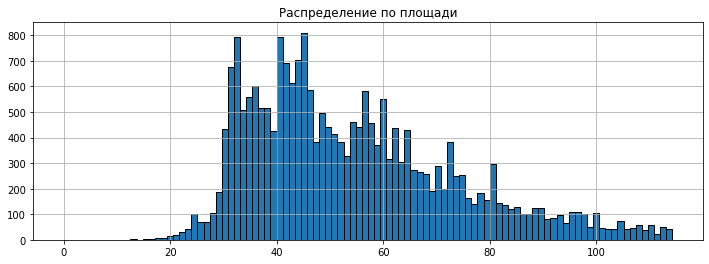

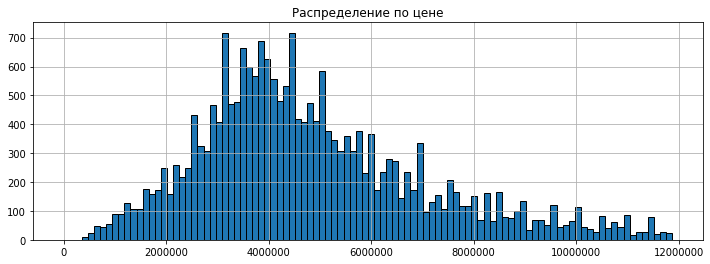

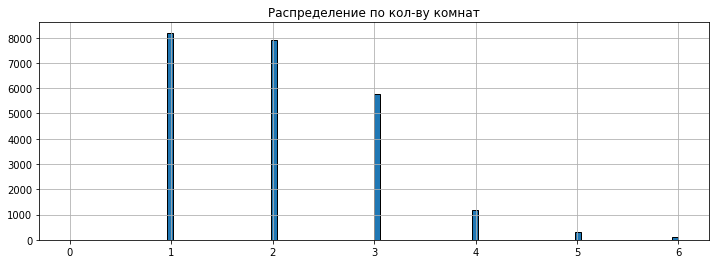

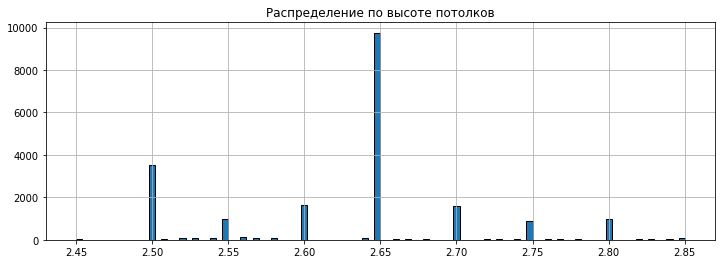

In [46]:
# гистограмма для total_area
df.hist('total_area', bins=100, 
        range=(min_total_area, max_total_area), 
        figsize=(12,4), ec='black')
plt.title('Распределение по площади')
plt.show()
# гистограмма для last_price
fig, ax = plt.subplots(figsize=(12,4))
df.hist('last_price', bins=100, 
        range=(min_last_price, max_last_price), 
        ec='black', ax = ax)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title('Распределение по цене')
plt.show()
# гистограмма для rooms
df.hist('rooms', bins=100, 
        range=(min_rooms, max_rooms), 
        figsize=(12,4), ec='black')
plt.title('Распределение по кол-ву комнат')
plt.show()
# гистограмма для ceiling_height
df.hist('ceiling_height', bins=100, 
        range=(min_ceiling_height, max_ceiling_height), 
        figsize=(12,4), ec='black')
plt.title('Распределение по высоте потолков')
plt.show()

- __Распределение по площади__ - в основном продаются квартиры от 30м² до 100м². Далее чем площадь больше - тем меньше объявлений.
- __Распределение по цене__ - довольно внушительный разброс цен. Но больше всего это 2,5 - 7млн.
- __Распределение по кол-ву комнат__ - однушки, двушки и трёшки лидируют. Самое большое кол-во объявления - однокомнатные (+студии). 
- __Распределение по высоте потолков__ - 2,5 - 3 метра. Вполне оптимально.

### 4.2. Исследование времени продажи квартиры.

Сначала нужно отфильтровать столбец __days_exposition__, т.к. ранее мы `замаркеровали` отсутствующие значения __-9__.

In [47]:
df.query('days_exposition >= 0')['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

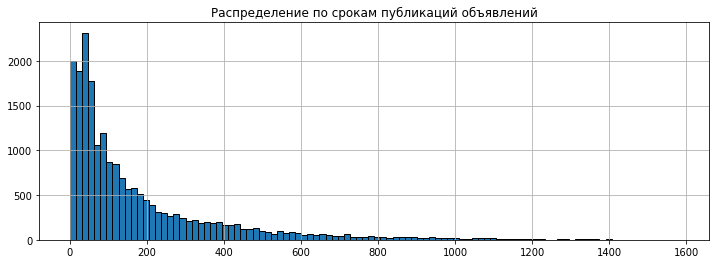

In [48]:
df.query('days_exposition >= 0').hist('days_exposition', bins=100, figsize=(12,4), ec='black')
plt.title('Распределение по срокам публикаций объявлений')
plt.show()

В среднем квартиру продают 180 дней (пол года), однако половина объявлений снимается за 95 дней. Есть объявления которым почти 5 лет. Посмотрим на boxplot:

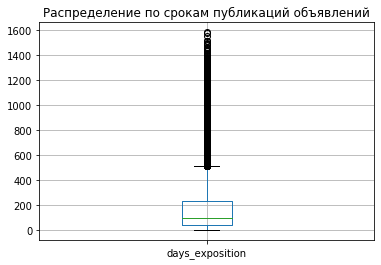

In [49]:
df.query('days_exposition >= 0').boxplot('days_exposition')
plt.title('Распределение по срокам публикаций объявлений')
plt.show()

Уберём объявления старше 500 дней - посмотрим на распределение более детально:

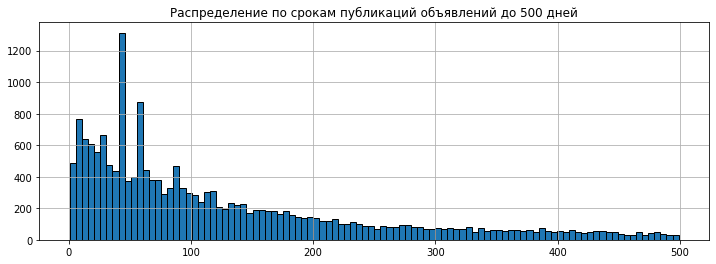

In [50]:
df.query('0 <= days_exposition < 500').hist('days_exposition', bins=100, figsize=(12,4), ec='black')
plt.title('Распределение по срокам публикаций объявлений до 500 дней')
plt.show()

Есть какие-то всплески до 100 дней. Ограничим до 100:

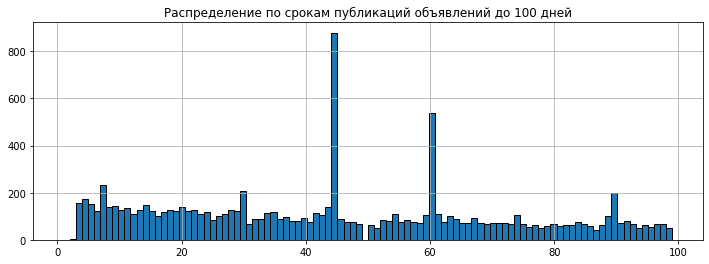

In [51]:
df.query('0 <= days_exposition < 100').hist('days_exposition', bins=100, figsize=(12,4), ec='black')
plt.title('Распределение по срокам публикаций объявлений до 100 дней')
plt.show()

Очевидно что есть определённые дни когда объявления снимаются массово. Возможно это происходит на уровне системы, либо продавцам приходит "напоминание" из разряда: "Не забыли ли снять публикацию?".

### 4.3. Какие фаторы больше всего влияют на стоимость квартиры?

В пункте 1.4.1 мы уже выявили выбросы и редкие значения, отфильтруем нашу таблицу и сохраним её в переменную `df_clean`.

In [52]:
df_clean = (
    df
    .query('@min_total_area <= total_area <= @max_total_area and @min_last_price <= last_price <= @max_last_price and @min_rooms <= rooms <= @max_rooms and @min_ceiling_height <= ceiling_height <= @max_ceiling_height')
)

In [53]:
df_clean.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,m2_price,day_of_weak,month,year,floor_level,ratio_living_area,ratio_kitchen_area
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,-9,81,82920,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558,92785,Thursday,August,2015,другой,0.61,0.15
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,-9,-9,55,95065,Monday,September,2018,другой,0.47,0.30
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0,-9,155,99195,Thursday,November,2017,другой,0.28,0.39
7,5,7915000,71.6,2019-04-18,2,2.65,24,30.5,22,False,...,0,-9,-9,110544,Thursday,April,2019,другой,0.43,0.26


Посмотрим как влияют на стоимость квартиры (за м²): площадь, количество комнат, расстояние от центра и этаж.

In [54]:
df_clean_parameter = df_clean[['total_area','rooms','city_centers_nearest','m2_price','floor_level']]
# Не забудем убрать наше замаркированное значения с расстоянием до центра:
df_clean_parameter = df_clean_parameter.query('city_centers_nearest >= 0')

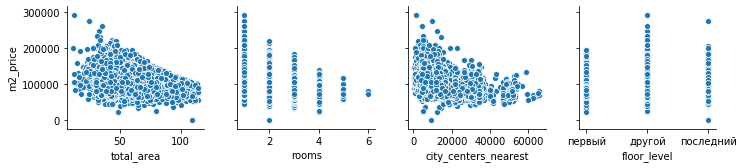

                      total_area     rooms  city_centers_nearest  m2_price
total_area              1.000000  0.793022             -0.071033 -0.189480
rooms                   0.793022  1.000000             -0.028460 -0.345913
city_centers_nearest   -0.071033 -0.028460              1.000000 -0.402323
m2_price               -0.189480 -0.345913             -0.402323  1.000000


In [55]:
sns.pairplot(df_clean_parameter,
             x_vars=['total_area','rooms','city_centers_nearest', 'floor_level'],
             y_vars=["m2_price"],
             )
plt.show()
print(df_clean_parameter.corr())

Корреляция отрицательная:
 - квадратный метр становится дешевле чем больше площадь квартиры 
 - ну а чем больше площадь, тем больше колличество комнат, коэффициент корреляции это нам подверждает соответсвенно при увеличении количества комнат цена за квадратный метр тоже падает. 
 - с увеличением расстояния от центра города цена тоже становится ниже, при чём это значение влияет на стоимость больше чем остальные.
 - первый и последний этажи стоят дешевле.

Посмотрим как время (год, месяц, день) влияют на стоимость жилья:

In [56]:
# для этого скопируем наши данные очищенные в переменную data_clean
data_clean = df_clean.copy()
# поменяем названия дней недели для наглядности на графике
data_clean['day_of_weak'] = (data_clean['day_of_weak'].replace(
    {'Monday': 1, 'Tuesday': 2,  'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}))
# и месяцев
data_clean['month'] = (data_clean['month'].replace(
    {'January': 1, 'February': 2,  'March': 3, 'April': 4, 'May': 5, 'June': 6, 
     'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}))

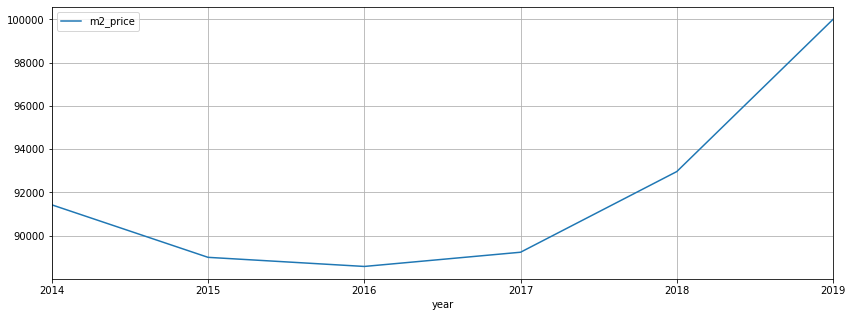

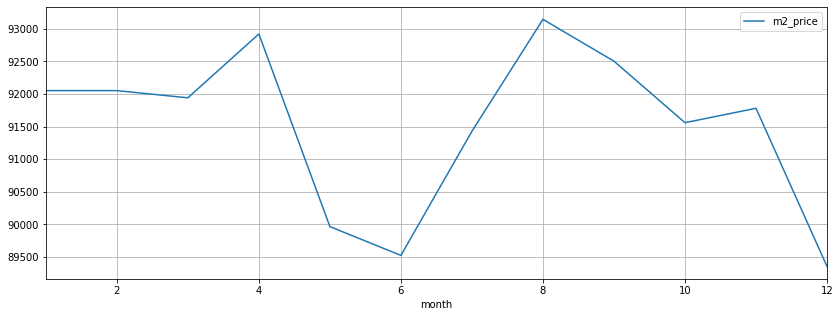

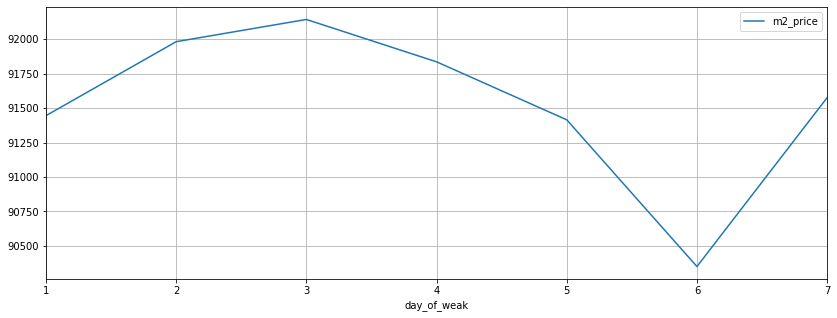

In [57]:
# создадим список
name_clean_date = ['year', 'month', 'day_of_weak']
# посмотрим как менялась стоимость квартир со временем
for name in name_clean_date:
    (data_clean.pivot_table(index=name, values='m2_price', aggfunc='median')
    .sort_values(by=name).plot(grid=True, figsize=(14,5)))
plt.show()

- до 2016 года цена за м² падала, потом поползла вверх, видимо это связано с процентной ставкой по ипотеке, а в 2018г ценник прям "взлетел", на что скорее всего повлиял закон 214-фз.
- лето (сезон отпусков) и зима (новогодние праздники), людям не до недвижимости, цена и падает, т.к. меньше спрос.
- тоже самое и с днями недели к выходным, но в воскресенье "резкий скачок", видимо продавцы готовятся на будущую неделю.

Составим ТОП 10 населённых пунктов по количеству объявлений

In [58]:
df_clean_locality = (data_clean.groupby('locality_name')['m2_price']
                     .agg(['count', 'median']).sort_values(by = 'count', ascending=False))
df_clean_locality.head(10)

,count,median
locality_name,,
Санкт-Петербург,12005,101538.0
посёлок Мурино,513,85714.0
посёлок Шушары,433,76666.0
Всеволожск,380,65789.0
посёлок Парголово,326,91779.5
Колпино,315,74733.0
Пушкин,299,98039.0
деревня Кудрово,296,91930.0
Гатчина,283,67647.0


Санкт-Петербург на первом месте, они и понятно, чем больше жителей - тем больше объявлений. Интересно, в каком населённом пункте самое дорогое и самое дешёвое жильё?

In [59]:
print('Самая высокая стоимость жилья за м²')
df_clean_locality.sort_values(by='median', ascending=False).head()

Самая высокая стоимость жилья за м²


,count,median
locality_name,,
посёлок Лисий Нос,1,168706.0
Санкт-Петербург,12005,101538.0
Кудрово,168,99890.5
Сестрорецк,143,98958.0
Зеленогорск,20,98596.0


В посёлке Лисий Нос видимо продаётся какое-то элитное жильё (всего 1 объявление). Значительно дороже м² чем даже в Питере, а там 12005 объявлений.

In [60]:
print('Самая низкая стоимость жилья за м²')
df_clean_locality.sort_values(by='median').head()

Самая низкая стоимость жилья за м²


,count,median
locality_name,,
деревня Старополье,3,11000.0
посёлок станции Свирь,2,11481.0
деревня Вахнова Кара,1,11688.0
деревня Выскатка,2,12335.0
поселок Совхозный,2,12628.5


Минимальная и максимальная стоимость жилья отличается почти в 10 раз! Недвижимость дешевле в посёлках и деревнях, возможно в значительном удалении от центра города.

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Довольно очевидно, но очень хорошо что обратил внимание даже на такие мелочи
</div>

### 4.4. Изучения предложений квартир

Итак у нас 12005 объявлений только в Питере - это половина от всех объявлений! Стоит посмотреть на них внимательнее. для этого:
- отфильтруем нашу таблицу по Санкт-Петербургу
- переведём расстояние от центра в км, и сгрупируем их
- проверим как влияет цена на удалённость от центра, и вообще выявим центральную зону.

In [61]:
# сохраним в data_clean таблицу без маркировки -9 с объявлениями Санкт-Петербург
data_final = data_clean.copy()
data_final = data_final.query('city_centers_nearest >= 0 and locality_name == "Санкт-Петербург"')
# переведём city_centers_nearest в км и округлим до целого числа
data_final['city_centers_nearest'] = (data_final['city_centers_nearest'] / 1000).round(0)

In [62]:
# группируем по км от центра и выведем цену по медиане
df_distance_pivot = (data_final
                           .pivot_table(index='city_centers_nearest', 
                                        values='m2_price',
                                       aggfunc='median'))
# посмотрим в скольких км самый дорогой м²
df_distance_pivot.sort_values(by='m2_price', ascending=False).head()

,m2_price
city_centers_nearest,
5.0,122105.0
6.0,121710.0
7.0,115307.5
2.0,114000.0
4.0,113439.0


Посмотрим как меняется цена от удалённости:

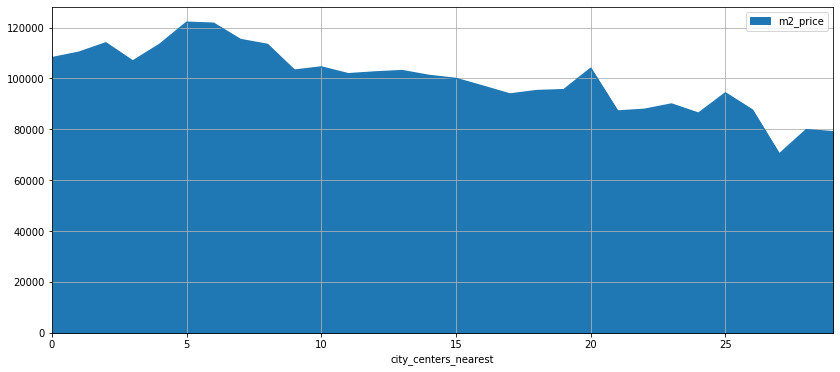

In [63]:
df_distance_pivot.sort_values(by='city_centers_nearest').plot(kind='area', figsize=(14,6), grid=True,)
plt.show()

До 2км ценник увеличивается, в районе 3км проседает, далее с 4км начинает снова увеличиваться и уже резко проседает в районе 8-9км.

Посмотрим более детально, в значениях:

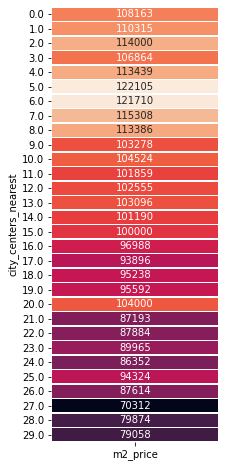

In [64]:
f, ax = plt.subplots(figsize=(3, 8))
ax = sns.heatmap(df_distance_pivot, annot=True, fmt=".0f", cbar=False, linewidths=.5)
plt.show()

- **0-4км** стоят дешевле чем 5-6км, скорее всего это связано с тем что это более старые здания "советские постройки", либо дома "старого фонда", которые в советское время были переделаны под коммуналки
- **3км** дешевле в этом сегменте т.к. наибольшая удалённость от исторического центра (музеев, площадей и т.п.)
- **5-6км** начинаются более современные дома, отсюда и пик в стоимости за м²
- **7-8км** заканчивается `центральная зона`, дальше наблюдаем резкий спад цены

Определим, что 0-8км - это наша `центральная зона`.

### 4.5. Анализ квартир в центре

Итак мы определили границы `центральной зоны` - 8км. Посмотрим на рынок недвижимости в центре и сравним с общими показателями. Отличаются ли они? Для этого вернёмся к нашей очищенной таблице data_clean.

In [65]:
data_center = data_final.query('city_centers_nearest < 9')
print('Количество объявлений в центральной зоне:', len(data_center))

Количество объявлений в центральной зоне: 1649


Посмотрим как выглядит распределение по параметрам в `центральной зоне`:

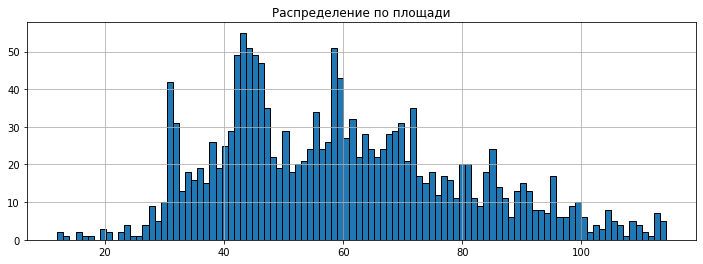

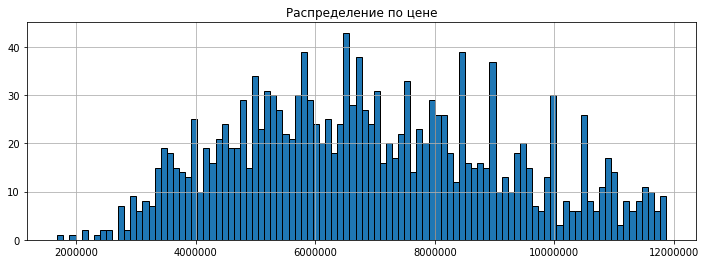

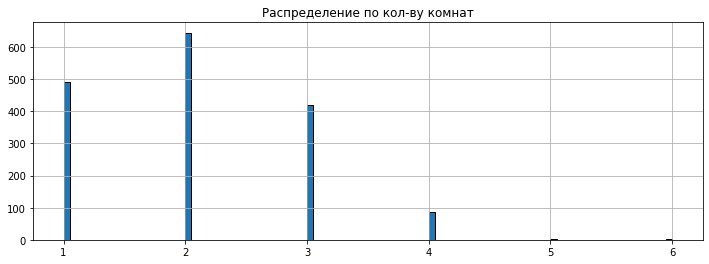

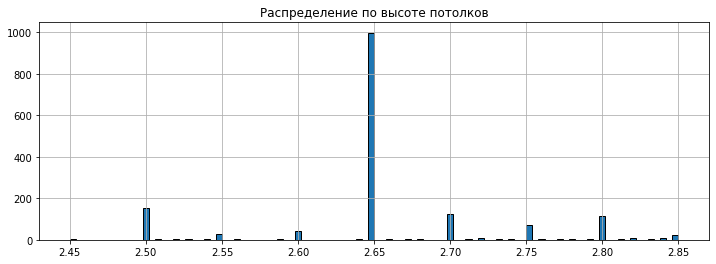

In [66]:
# гистограмма для total_area
data_center.hist('total_area', bins=100,  
        figsize=(12,4), ec='black')
plt.title('Распределение по площади')
plt.show()
# гистограмма для last_price
fig, ax = plt.subplots(figsize=(12,4))
data_center.hist('last_price', bins=100, 
        ec='black', ax = ax)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title('Распределение по цене')
plt.show()
# гистограмма для rooms
data_center.hist('rooms', bins=100, 
        figsize=(12,4), ec='black')
plt.title('Распределение по кол-ву комнат')
plt.show()
# гистограмма для ceiling_height
data_center.hist('ceiling_height', bins=100, 
        figsize=(12,4), ec='black')
plt.title('Распределение по высоте потолков')
plt.show()

- по __площади__ всё примерно тоже самое что и по всему региону
- по __цене__ всё совсем иначе, центр конечно же дороже, объявления в основном больше 4млн.
- __число комнат__ тоже выглядит по другому двушки в центре преобладают
- __высота потолков__ не отличается

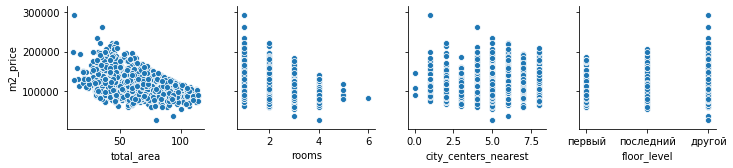

                      total_area     rooms  city_centers_nearest  m2_price
total_area              1.000000  0.793022             -0.071033 -0.189480
rooms                   0.793022  1.000000             -0.028460 -0.345913
city_centers_nearest   -0.071033 -0.028460              1.000000 -0.402323
m2_price               -0.189480 -0.345913             -0.402323  1.000000


In [67]:
# 
data_center_corr = data_center[['total_area','rooms','city_centers_nearest','m2_price','floor_level']]

sns.pairplot(data_center_corr,
             x_vars=['total_area','rooms','city_centers_nearest', 'floor_level'],
             y_vars=["m2_price"],
             )
plt.show()
print(df_clean_parameter.corr())

Картинка такая же как и общая:

- квадратный метр становится дешевле чем больше площадь квартиры
- ну а чем больше площадь, тем больше колличество комнат, коэффициент корреляции это нам подверждает соответсвенно при увеличении количества комнат цена за квадратный метр тоже падает.
- с увеличением расстояния от центра города цена тоже становится ниже, но если посмотреть на график зависимости, то можно увидеть что разброс цен в зависимости от удаления от центра очень большой, возможно на это вляиет историческая ценность определённых мест.
- первый и последний этажи стоят дешевле.

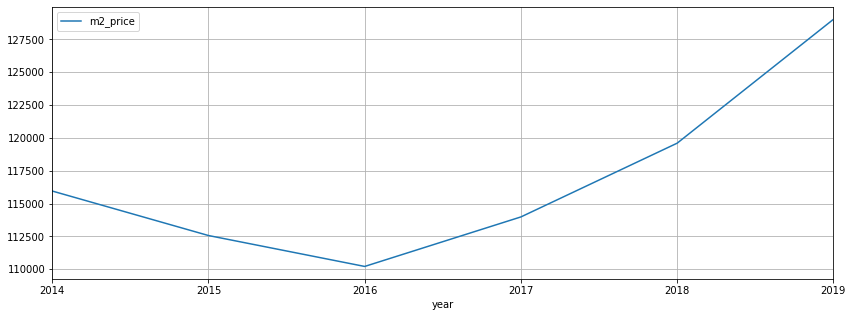

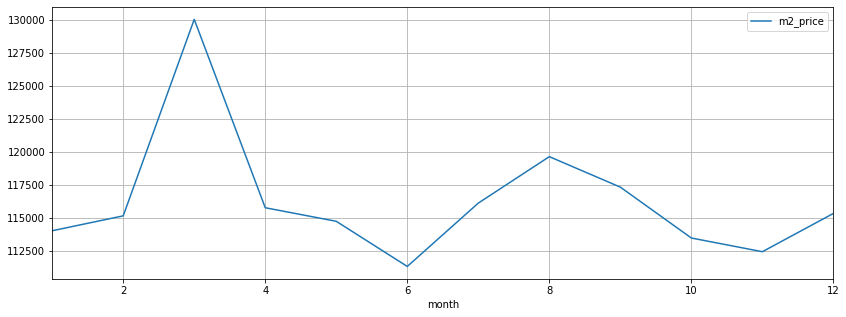

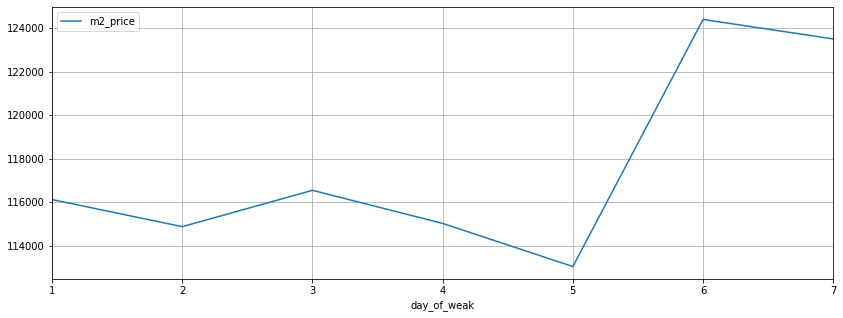

In [68]:
# создадим список
name_center_date = ['year', 'month', 'day_of_weak']
# посмотрим как менялась стоимость квартир со временем
for name in name_center_date:
    (data_center.pivot_table(index=name, values='m2_price', aggfunc='median')
    .sort_values(by=name).plot(grid=True, figsize=(14,5)))
plt.show()


- по годам такая же картина как общая до 2016 года цена за м² падала, потом поползла вверх
- по месяцам тоже основныне скачки в цене приходятся на весну и осень
- а вот по дням ситуация отличается, гораздо дороже объявления выставлялись в пятницу и выходные

## Общий вывод

Мы выяснили:
- чем больше квартира тем дешевле стоимость м²
- преобладающее большинство квартир - однокомнатные. А в `центральной зоне` - двухкомнатные.
- первый и последний этажи стоят дешевле, чем квартиры на других этажах.
- с 2016г. стоимость квартир растёт
- дороже всего квартиры выставляют весной и осенью, а так же по будням. Однако, в `центральной зоне` квартиры размещают дороже по выходным
- в среднем квартира продаётся за 180 дней (пол года)

В целом рынок `центральной зоны` не сильно отличается в зависимости цены от параметров квартиры и удалённости от центра, но вариативность цен более разнообразна, что скорее всего зависит от статуса улицы/района.

